In [98]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [99]:
credits=pd.read_csv("tmdb_5000_credits.csv")
movies=pd.read_csv("tmdb_5000_movies.csv")

In [100]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [101]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [102]:
#basically credits consist of movie id its title  and its cast and crew info

In [103]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [104]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [105]:
#Basically this dataset consist of complete information of a movie i.e its budget,genre,main_plot,language etc but 
#For this weighted average recommendation system we donot require the budget or genre on non calculative info
#This is because this type of recommendation system only requires the calculative part i.e vote_average,vote_count ,popularity, hence we can drop irrelavant columns.

In [106]:
movies.drop(['budget','genres','homepage','keywords','original_language','overview','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','tagline'],axis=1,inplace=True)

In [107]:
movies.head()

,id,original_title,popularity,title,vote_average,vote_count
0,19995,Avatar,150.437577,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,139.082615,Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,107.376788,Spectre,6.3,4466
3,49026,The Dark Knight Rises,112.312950,The Dark Knight Rises,7.6,9106
4,49529,John Carter,43.926995,John Carter,6.1,2124


In [108]:
credits.shape

(4803, 4)

In [109]:
movies.shape

(4803, 6)

In [110]:
#so as we know this is a weighted average recommendation system so cast,crew do not affect the outlet 

In [111]:
#we only care for movies 

In [112]:
#weighted average formula

In [113]:
#we have V,R,C,M

In [114]:
V=movies['vote_count']
R=movies['vote_average']
C=movies['vote_average'].mean()
M=movies['vote_average'].quantile(0.70)

In [115]:
Weighted_score=((R*V)+(C*M))/(V+M)

In [116]:
movies['weighted_score']=Weighted_score

In [117]:
movies.head()

,id,original_title,popularity,title,vote_average,vote_count,weighted_score
0,19995,Avatar,150.437577,Avatar,7.2,11800,7.199371
1,285,Pirates of the Caribbean: At World's End,139.082615,Pirates of the Caribbean: At World's End,6.9,4500,6.898799
2,206647,Spectre,107.376788,Spectre,6.3,4466,6.299689
3,49026,The Dark Knight Rises,112.312950,The Dark Knight Rises,7.6,9106,7.598891
4,49529,John Carter,43.926995,John Carter,6.1,2124,6.099975


In [118]:
#sort by popularity
popularity=movies.copy().sort_values('popularity',ascending=False)

In [119]:
popularity.head()

,id,original_title,popularity,title,vote_average,vote_count,weighted_score
546,211672,Minions,875.581305,Minions,6.4,4571,6.399549
95,157336,Interstellar,724.247784,Interstellar,8.1,10867,8.098763
788,293660,Deadpool,514.569956,Deadpool,7.4,10995,7.399204
94,118340,Guardians of the Galaxy,481.098624,Guardians of the Galaxy,7.9,9742,7.898758
127,76341,Mad Max: Fury Road,434.278564,Mad Max: Fury Road,7.2,9427,7.199213


In [120]:
#sort by weighted score
weighted_score=movies.copy().sort_values('weighted_score',ascending=False)

In [121]:
weighted_score.head()

,id,original_title,popularity,title,vote_average,vote_count,weighted_score
1881,278,The Shawshank Redemption,136.747729,The Shawshank Redemption,8.5,8205,8.498035
3337,238,The Godfather,143.659698,The Godfather,8.4,5893,8.397379
662,550,Fight Club,146.757391,Fight Club,8.3,9413,8.298430
3232,680,Pulp Fiction,121.463076,Pulp Fiction,8.3,8428,8.298246
1818,424,Schindler's List,104.469351,Schindler's List,8.3,4329,8.296588


In [122]:
#Now visualising the data using sorted data frames

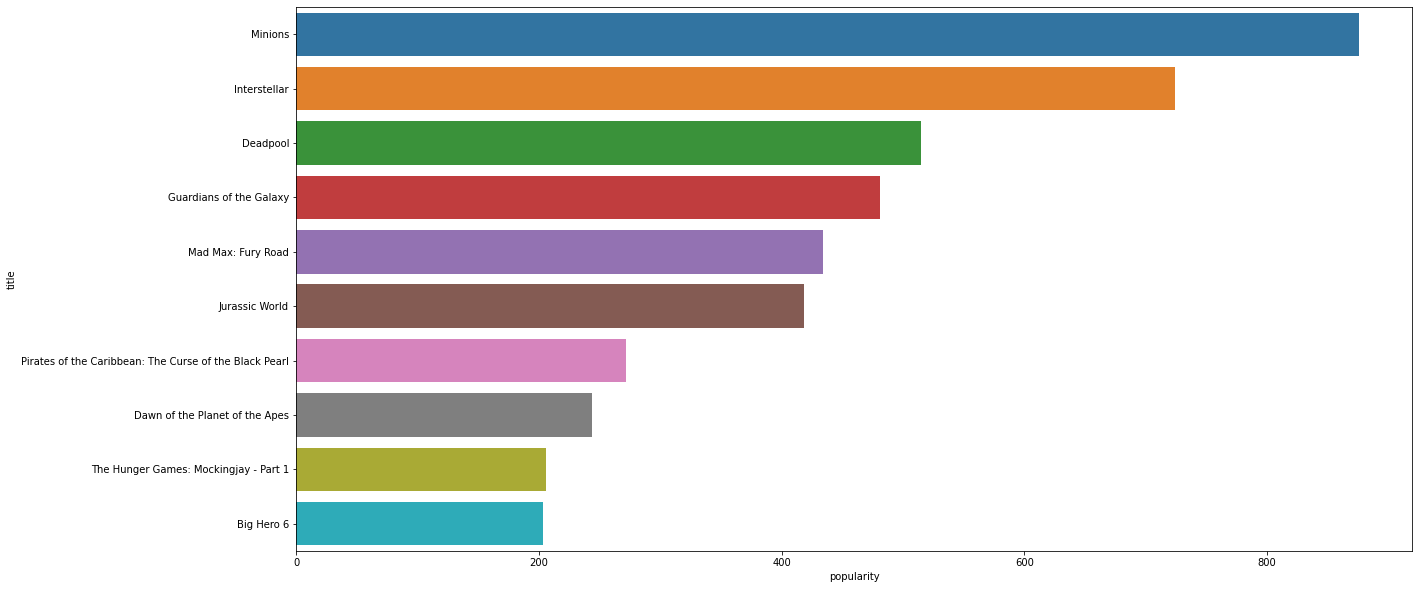

In [123]:
plt.figure(figsize=(20,10))
sns.barplot(x=popularity['popularity'][:10],y=popularity['title'][:10])
plt.show()

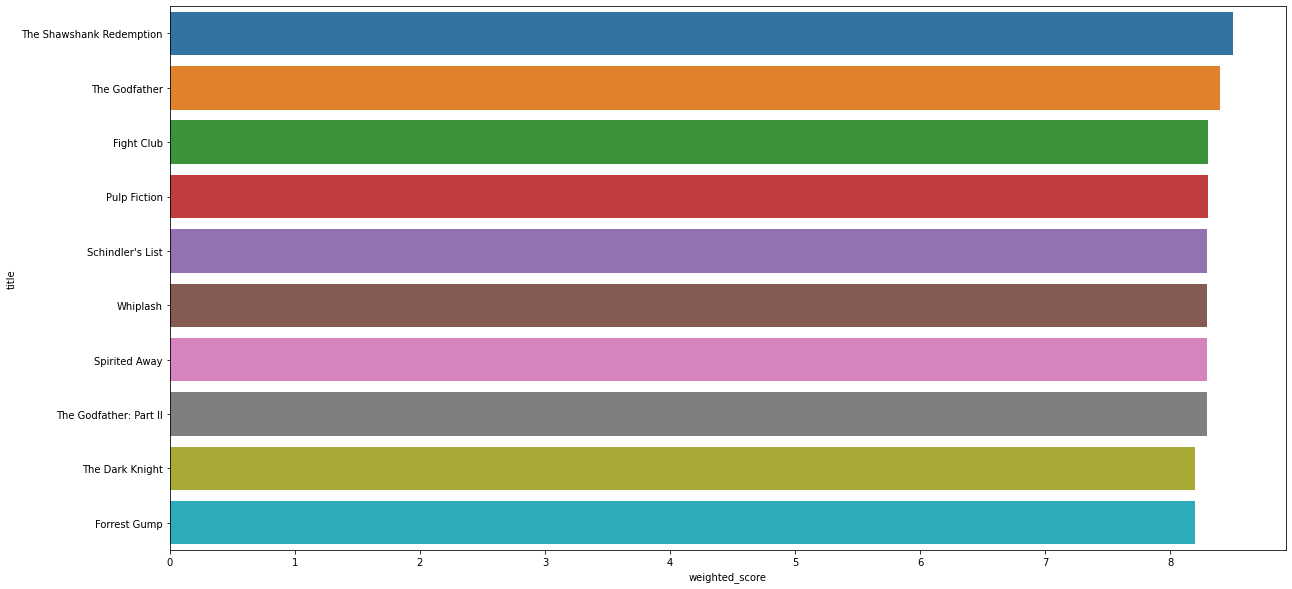

In [124]:
plt.figure(figsize=(20,10))
sns.barplot(x=weighted_score['weighted_score'][:10],y=weighted_score['title'][:10])
plt.show()

In [125]:
# Now normalizing the  the values of weighted score and popularity

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
scaler=MinMaxScaler()

In [128]:
preprocess=scaler.fit_transform(preprocessor)
preprocessor=pd.DataFrame(data=preprocess,columns=['weighted_score','popularity'])

In [129]:
movies['normalized_score']=preprocessor['weighted_score']
movies['normalized_popularity']=preprocessor['popularity']

In [130]:
movies.head()

,id,original_title,popularity,title,vote_average,vote_count,weighted_score,normalized_score,normalized_popularity
0,19995,Avatar,150.437577,Avatar,7.2,11800,7.199371,0.780797,0.171815
1,285,Pirates of the Caribbean: At World's End,139.082615,Pirates of the Caribbean: At World's End,6.9,4500,6.898799,0.730063,0.158846
2,206647,Spectre,107.376788,Spectre,6.3,4466,6.299689,0.628938,0.122635
3,49026,The Dark Knight Rises,112.312950,The Dark Knight Rises,7.6,9106,7.598891,0.848232,0.128272
4,49529,John Carter,43.926995,John Carter,6.1,2124,6.099975,0.595228,0.050169


In [131]:
#Now removing unwanted columns after preprocessing the data

In [132]:
movies.drop(['original_title','popularity','vote_average','vote_count','weighted_score'],axis=1,inplace=True)

In [133]:
movies.head()

,id,title,normalized_score,normalized_popularity
0,19995,Avatar,0.780797,0.171815
1,285,Pirates of the Caribbean: At World's End,0.730063,0.158846
2,206647,Spectre,0.628938,0.122635
3,49026,The Dark Knight Rises,0.848232,0.128272
4,49529,John Carter,0.595228,0.050169


In [134]:
#Now calculating the score on the basis of 50% 50% on the basis of normalized score and normalized popularity

In [135]:
movies['final_score']=movies['normalized_score']*0.5+movies['normalized_popularity']*0.5

In [136]:
movies.head()

,id,title,normalized_score,normalized_popularity,final_score
0,19995,Avatar,0.780797,0.171815,0.476306
1,285,Pirates of the Caribbean: At World's End,0.730063,0.158846,0.444454
2,206647,Spectre,0.628938,0.122635,0.375786
3,49026,The Dark Knight Rises,0.848232,0.128272,0.488252
4,49529,John Carter,0.595228,0.050169,0.322699


In [137]:
#Final System

In [138]:
final_system=movies.sort_values(['final_score'],ascending=False)

In [139]:
final_system.head(20)

,id,title,normalized_score,normalized_popularity,final_score
95,157336,Interstellar,0.932606,0.827162,0.879884
546,211672,Minions,0.645794,1.000000,0.822897
94,118340,Guardians of the Galaxy,0.898847,0.549462,0.724155
788,293660,Deadpool,0.814527,0.587690,0.701108
127,76341,Mad Max: Fury Road,0.780770,0.495989,0.638379
3865,244786,Whiplash,0.965987,0.219887,0.592937
65,155,The Dark Knight,0.949496,0.213941,0.581718
1881,278,The Shawshank Redemption,1.000000,0.156179,0.578090
3337,238,The Godfather,0.983010,0.164074,0.573542
199,22,Pirates of the Caribbean: The Curse of the Bla...,0.831313,0.310620,0.570966


In [140]:
#So this is end of our Weighted Average Recommendation System 

In [141]:
#And this is the only movies this system shows to user.
#This is old generation recommendation 
#User only gets highest scored movies and every user gets the same recommendation from the system.


In [143]:
#Now we will see the other two types of recommendation systen 
